In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 4.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = (y_train == 3).astype("float32")
y_test = (y_test == 3).astype("float32")


11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# model construct
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [4]:

# Define the SGD optimizer
optimizer = keras.optimizers.SGD(learning_rate= 0.05 )

# Compile the model
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [5]:
# Define a callback to track the training loss
class LossHistory(keras.callbacks.Callback):
    def __init__(self):
        super(LossHistory, self).__init__()
        self.losses = []

    def on_epoch_end(self, epoch, logs=None):
        self.losses.append(logs['loss'])

history = LossHistory()
# class에 대한 자세한 설명은 다른 수업에서의 기회로 넘기겠습니다. 

Epoch 1/20
469/469 [==============================] - 0s 394us/step - loss: 0.1440 - accuracy: 0.9527
Epoch 2/20
469/469 [==============================] - 0s 333us/step - loss: 0.0963 - accuracy: 0.9701
Epoch 3/20
469/469 [==============================] - 0s 329us/step - loss: 0.0884 - accuracy: 0.9730
Epoch 4/20
469/469 [==============================] - 0s 348us/step - loss: 0.0829 - accuracy: 0.9748
Epoch 5/20
469/469 [==============================] - 0s 343us/step - loss: 0.0785 - accuracy: 0.9763
Epoch 6/20
469/469 [==============================] - 0s 329us/step - loss: 0.0747 - accuracy: 0.9772
Epoch 7/20
469/469 [==============================] - 0s 329us/step - loss: 0.0713 - accuracy: 0.9787
Epoch 8/20
469/469 [==============================] - 0s 331us/step - loss: 0.0680 - accuracy: 0.9797
Epoch 9/20
469/469 [==============================] - 0s 328us/step - loss: 0.0649 - accuracy: 0.9801
Epoch 10/20
469/469 [==============================] - 0s 329us/step - loss: 0.062

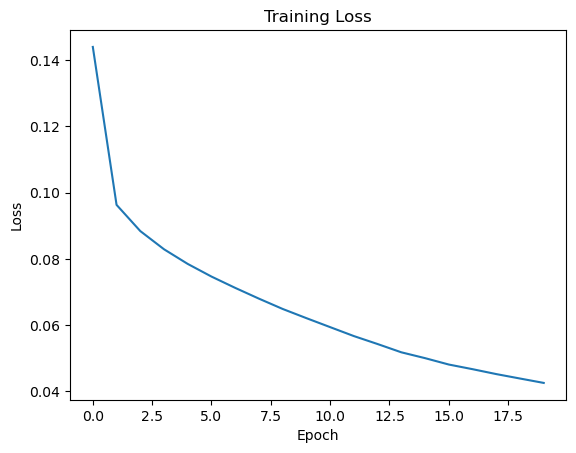

313/313 [==============================] - 0s 253us/step - loss: 0.0407 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


In [6]:
# Train the model
epochs = 20
batch_size = 128

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[history])

# Plot the training loss
plt.plot(range(len(history.losses)), history.losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 189us/step


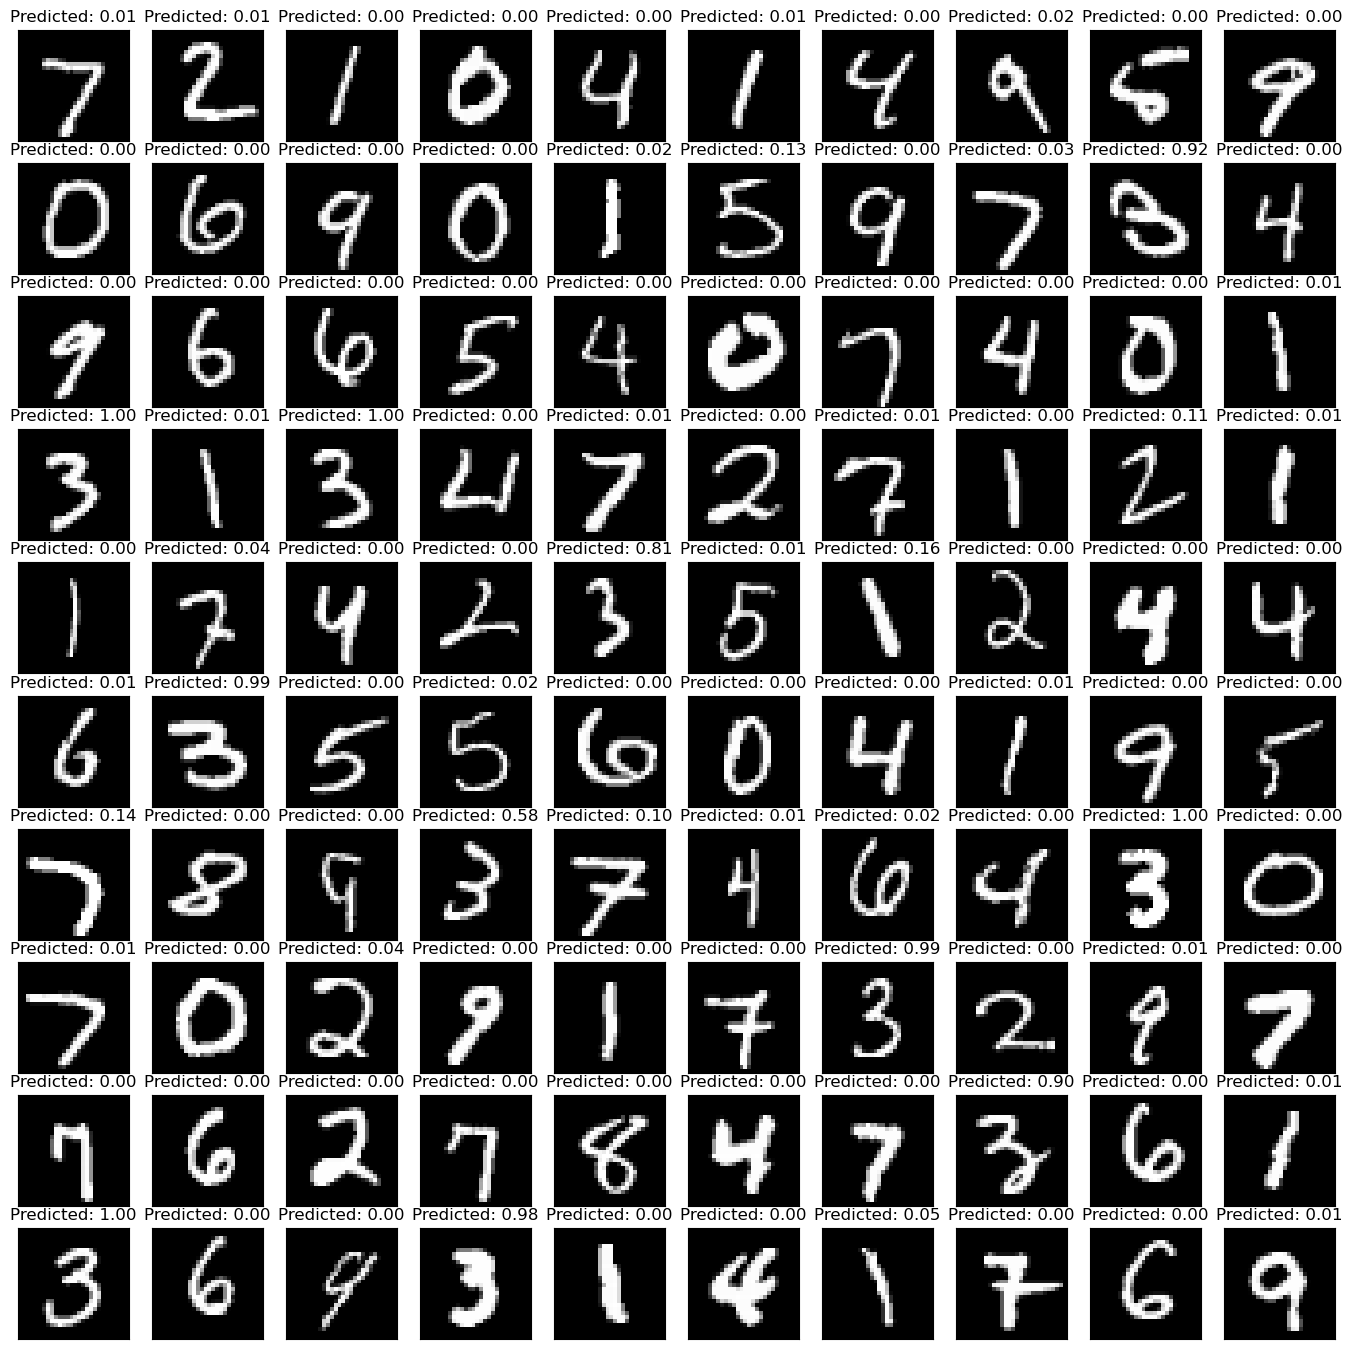

In [7]:
# Predict on the test set
y_pred = model.predict(x_test)

# Visualize some of the test images with their predicted labels
fig, axes = plt.subplots(10, 10, figsize=(17, 17))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Predicted: {y_pred[i][0]:.2f}")
plt.show()